# 酶活性预测实战
1、基于T-R-train.csv数据，建立线性回归模型，计算其在T-R-test.csv数据上  
的r2分数，可视化模型预测结果  
2、加入多项式特征（2次、5次），建立回归模型  
3、计算多项式回归模型对测试数据进行预测的r2分数，判断哪个模型预测更准确  
4、可视化多项式回归模型预测结果，判断哪个模型预测更准确  

In [1]:
#load the data
import pandas as pd
import numpy as np
data_train = pd.read_csv('T-R-train.csv')
data_train.head()

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


Text(0, 0.5, 'rate')

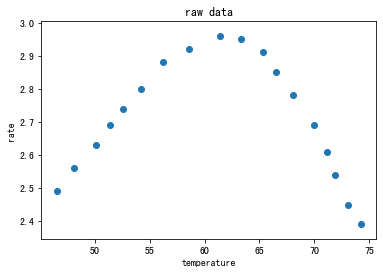

In [2]:
#define X_train and y_train
X_train = np.array(data_train['T']).reshape(-1, 1)
y_train = data_train['rate']
#visualize the data
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_train, y_train)
ax.set_title('raw data')
ax.set_xlabel('temperature')
ax.set_ylabel('rate')

In [3]:
#linear regression model prediction
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
#load the test data
data_test = pd.read_csv('T-R-test.csv')
X_test = np.array(data_test['T']).reshape(-1, 1)
y_test = data_test['rate']
#make prediction on the training and testing data
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print('r2_train: ', r2_train)
print('r2_test: ', r2_test)

r2_train:  0.016665703886981964
r2_test:  -0.7583363437351314


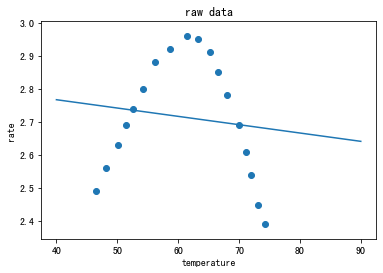

In [5]:
#visualize the data
X_range = np.linspace(40, 90, 300).reshape(-1, 1)
y_range_predict = lr1.predict(X_range)
p1, = ax.plot(X_range, y_range_predict)
fig

In [6]:
#多项式模型
#generate new features
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)
poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)

In [7]:
lr2 = LinearRegression()
lr2.fit(X_2_train, y_train)
y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train, y_2_train_predict)
r2_2_test = r2_score(y_test, y_2_test_predict)

lr5 = LinearRegression()
lr5.fit(X_5_train, y_train)
y_5_train_predict = lr5.predict(X_5_train)
y_5_test_predict = lr5.predict(X_5_test)
r2_5_train = r2_score(y_train, y_5_train_predict)
r2_5_test = r2_score(y_test, y_5_test_predict)

print('training r2_2:', r2_2_train)
print('test     r2_2:', r2_2_test)
print('training r2_5:', r2_5_train)
print('test     r2_5:', r2_5_test)

training r2_2: 0.970051540068943
test     r2_2: 0.996395455646867
training r2_5: 0.9978527267142803
test     r2_5: 0.5437845982167842


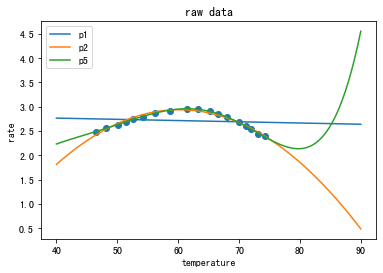

In [8]:
X_2_range = poly2.transform(X_range)
y_2_range_predict = lr2.predict(X_2_range)

X_5_range = poly5.transform(X_range)
y_5_range_predict = lr5.predict(X_5_range)

p2, = ax.plot(X_range, y_2_range_predict)
p5, = ax.plot(X_range, y_5_range_predict)
ax.legend((p1, p2, p5), ('p1', 'p2', 'p5'))
fig

酶活性预测实战summary:  
1、通过建立二阶多项式回归模型，对酶活性实现了一个较好的预测，无论针对训练或  
测试数据都得到一个高的r2分数。  
2、通过建立线性回归、五阶多项式回归模型，发现存在过拟合或欠拟合情况。过拟合  
情况下，对于训练数据r2分数高，但对于预测数据r2分数低。  
3、无论是通过r2分数，或是可视化模型结果，都可以发现二阶多项式回归模型效果最好。
